# Sentiment Analysis in Python

This notebook is part of a tutorial that can be found on my [youtube channel here](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw), please check it out!

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

In [7]:
import torch
print(torch.cuda.is_available())  # Harus True jika CUDA tersedia


ModuleNotFoundError: No module named 'torch'

# Step 0. Read in Data and NLTK Basics

In [1]:
pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
alembic                      1.13.3
aniso8601                    9.0.1
anyio                        4.2.0
arabic-reshaper              3.0.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asn1crypto                   1.5.1
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
Babel                        2.11.0
beautifulsoup4               4.12.3
bleach                       4.1.0
blinker                      1.4
Brotli                       1.1.0
cachetools                   5.3.3
certifi                      2024.8.30
cffi                         1.17.1
chardet                      5.2.0
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.1
contourpy                    1

In [2]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [5]:
# Read in data
df = pd.read_csv('input/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.shape

(500, 10)

In [8]:
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

## Melihat EDA dari data

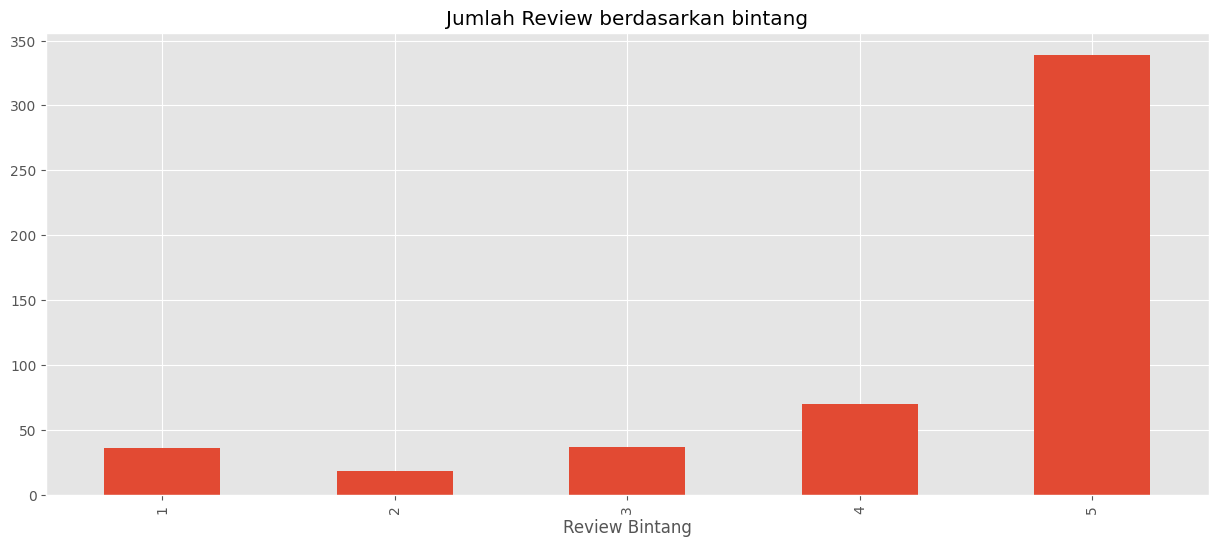

In [8]:
plotbar = df['Score'].value_counts().sort_index().plot(
    kind='bar',
    title='Jumlah Review berdasarkan bintang',
    figsize=(15,6)
)

plotbar.set_xlabel('Review Bintang')
plt.show()

## Basic NLTK

In [9]:
contoh_kalimat = df['Text'][50]
print(contoh_kalimat)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


<h1>TOKENIZING</h1>

<b>1. Install model tokenizing

In [15]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

<b>2. Lakukan word tokenizing pada kalimat atau korpus

In [28]:
import nltk
nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]    |   U

True

In [29]:
tokens = nltk.word_tokenize(contoh_kalimat)
tokens[0:10]


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

<b>3. POS Tagging → Menentukan jenis kata

In [30]:
# Unduh model POS tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Tag	Deskripsi	Contoh Kata<br>
CC	Coordinating conjunction	and, but, or<br>
CD	Cardinal number	one, two, 100<br>
DT	Determiner	the, a, an<br>
EX	Existential there	there<br>
FW	Foreign word	merci, pizza<br>
IN	Preposition/Subordinating conjunction	in, on, after<br>
JJ	Adjective	happy, large<br>
JJR	Adjective, comparative	bigger, faster<br>
JJS	Adjective, superlative	biggest, fastest<br>
LS	List item marker	1), A)<br>
MD	Modal verb	can, will, must<br>
NN	Noun, singular	dog, book, car<br>
NNS	Noun, plural	dogs, books<br>
NNP	Proper noun, singular	John, Google<br>
NNPS	Proper noun, plural	Americans, Sundays<br>
PDT	Predeterminer	all, both, many<br>
POS	Possessive ending	’s, ’<br>
PRP	Personal pronoun	I, you, he, she<br>
PRP$	Possessive pronoun	my, your, his<br>
RB	Adverb	quickly, never<br>
RBR	Adverb, comparative	faster, better<br>
RBS	Adverb, superlative	fastest, best<br>
RP	Particle	up, off, out<br>
SYM	Symbol	$, %, & <br>


TO	to (as a preposition)	to<br>
UH	Interjection	oh, wow, ugh<br>
VB	Verb, base form	run, eat, sleep<br>
VBD	Verb, past tense	ran, ate, slept<br>
VBG	Verb, gerund/present participle	running, eating<br>
VBN	Verb, past participle	eaten, gone<br>
VBP	Verb, non-3rd person singular present	run, eat<br>
VBZ	Verb, 3rd person singular present	runs, eats<br>
WDT	Wh-determiner	which, that<br>
WP	Wh-pronoun	who, what<br>
WP$	Possessive wh-pronoun	whose<br>
WRB	Wh-adverb	where, when<br>


In [32]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

<b> 4. Melakukan Named Entity Recognition (NER), yaitu mendeteksi nama entitas dalam suatu teks (misalnya nama orang, organisasi, lokasi, dll.).

In [33]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

vAder merupakan Model NLP dengan <b> Rule-based / Lexicon-based (Paling Sederhana) </b>

Contoh: VADER, SentiWordNet, AFINN
Berdasarkan kamus kata-kata sentimen yang sudah diberi skor positif/negatif.
Tidak belajar dari data baru, hanya mencocokkan kata dengan skor yang sudah ada.
Contoh VADER:
"good" (+1.9), "bad" (-2.5), "happy" (+2.3)
"I love this movie!" → Skor positif tinggi

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

<b>1. Mendefinisikan SentimentIntensityAnalyzer

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

<b>2.polarity_scores() memberikan skor positif, negatif, netral, dan compound.

Apa Itu Skor compound dalam VADER?
compound adalah skor sentimen keseluruhan yang dihitung sebagai nilai agregat dari skor positif (pos), negatif (neg), dan netral (neu) dalam teks.

Ciri-ciri skor compound:
✅ Berkisar antara -1 hingga +1
✅ Interpretasi:

Lebih dari 0 → Sentimen positif <br>
Kurang dari 0 → Sentimen negatif<br>
Mendekati 0 → Sentimen netral<br>


In [36]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [37]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [38]:
sia.polarity_scores(contoh_kalimat)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

<b>3.jalankan polarity_scores() untuk keseluruhan data.

In [40]:
from tqdm import tqdm


In [41]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 1852.63it/s]


In [46]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [47]:
vaders = pd.DataFrame(res).T #T for tranpose
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [48]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [50]:
vaders.shape

(500, 14)

<b>4. Plot VADER results

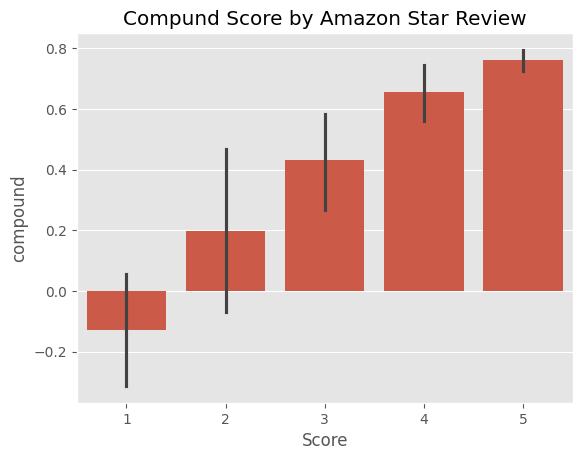

In [51]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

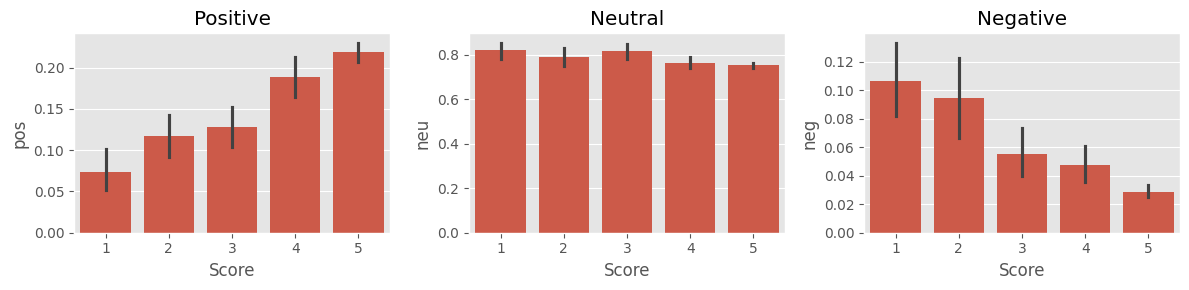

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

RoBERTa (Robustly optimized BERT approach) adalah model NLP yang dikembangkan oleh Facebook AI sebagai perbaikan dari BERT. Model ini menggunakan pendekatan unsupervised learning pada jumlah data yang lebih besar dengan teknik pelatihan yang lebih optimal.

Apa Itu RoBERTa?
RoBERTa adalah versi yang lebih kuat dari BERT, dengan perbedaan utama:

Lebih Banyak Data → RoBERTa dilatih dengan 10x lebih banyak data daripada BERT.
Tanpa NSP (Next Sentence Prediction) → RoBERTa menghapus tugas NSP yang ada di BERT karena dianggap tidak terlalu berguna.
Lebih Banyak Epochs → RoBERTa melakukan training lebih lama pada data yang lebih besar.
Batch Size Lebih Besar → RoBERTa menggunakan batch size lebih besar untuk meningkatkan generalisasi model.


Hugging Face adalah perusahaan yang menyediakan berbagai alat dan pustaka untuk Natural Language Processing (NLP) berbasis Transformer. Salah satu pustaka terkenalnya adalah 🤗 transformers, yang memungkinkan kita untuk dengan mudah menggunakan berbagai model berbasis Transformer seperti BERT, GPT, RoBERTa, T5, dll.



In [56]:
pip install transformers


     ---------------------------------------- 0.0/44.0 kB ? eta -:--:--
     -------------------------- ----------- 30.7/44.0 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 44.0/44.0 kB 718.8 kB/s eta 0:00:00
  Using cached filelock-3.17.0-py3-none-any.whl.metadata (2.9 kB)
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
    --------------------------------------- 0.2/10.0 MB 5.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.0 MB 8.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/10.0 MB 9.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/10.0 MB 10.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/10.0 MB 10.4 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/10.0 MB 10.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/10.0 MB 10.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/10.0 MB 10.9 MB/s eta 0:00:01
   --------

In [60]:
pip install scipy


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 647.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/41.2 MB 4.1 MB/s eta 0:00:10
    --------------------------------------- 0.7/41.2 MB 7.6 MB/s eta 0:00:06
   - -------------------------------------- 1.3/41.2 MB 8.9 MB/s eta 0:00:05
   - -------------------------------------- 1.8/41.2 MB 9.6 MB/s eta 0:00:05
   -- ------------------------------------- 2.3/41.2 MB 9.9 MB/s eta 0:00:04
   -- ------------------------------------- 2.9/41.2 MB 10.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/41.2 MB 10.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.9/41.2 MB 10.9 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/41.2 MB 11.0 MB/s eta 0:00:04
 

In [61]:
from transformers import AutoTokenizer # AutoTokenizer adalah tokenizer otomatis dari pustaka transformers.
from transformers import AutoModelForSequenceClassification #AutoModelForSequenceClassification adalah model Transformer yang sudah dilatih khusus untuk klasifikasi teks.
from scipy.special import softmax #Softmax adalah fungsi aktivasi yang mengubah skor logit menjadi probabilitas.

In [62]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\Heaven\anaconda3\envs\tensorflow31014\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Heaven\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-sentiment. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFAutoModelForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.


<b> MODEL = "cardiffnlp/twitter-roberta-base-sentiment"</b>

Model ini adalah RoBERTa yang telah dilatih oleh Cardiff NLP untuk analisis sentimen Twitter.
Model ini dapat mengklasifikasikan teks menjadi negatif, netral, atau positif.<br>

<b>AutoTokenizer.from_pretrained(MODEL)</b>

Memuat tokenizer yang sesuai dengan model.
Tokenizer mengubah teks menjadi token yang bisa dipahami oleh model.<br>

<b>AutoModelForSequenceClassification.from_pretrained(MODEL)</b>

Memuat model RoBERTa yang sudah dilatih untuk klasifikasi sentimen.
Model ini akan menerima input dari tokenizer dan menghasilkan skor untuk setiap kelas sentimen.


In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [ ]:
results_df.columns

# Step 3. Combine and compare

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

In [ ]:
# nevative sentiment 5-Star view

In [ ]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

In [ ]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

# Extra: The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

In [ ]:
sent_pipeline('I love sentiment analysis!')

In [ ]:
sent_pipeline('Make sure to like and subscribe!')

In [ ]:
sent_pipeline('booo')

# The End